<a href="https://colab.research.google.com/github/Ishita95-harvad/Real-Estate-DataSet/blob/main/Real_Estate_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real Estate DataSet**
Dragon Real Estate - Price Predictor

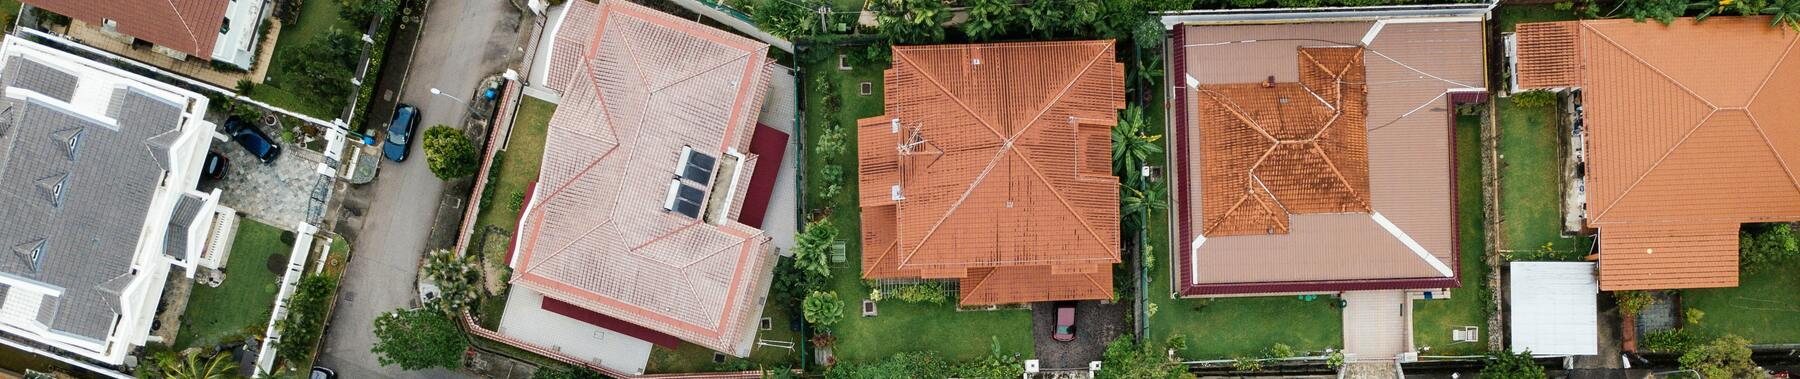

## Data loading

### Subtask:
Load the data from the provided CSV file "data.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "data.csv" into a pandas DataFrame, display its head, and print its shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
    df = None  # Set df to None to indicate failure
except pd.errors.EmptyDataError:
    print("Error: 'data.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'data.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


(511, 14)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, and get a sense of the data distributions. Determine the appropriate data types for each column.


**Reasoning**:
Explore the data by examining its basic statistics, checking for missing values, analyzing data types, visualizing data distributions, exploring relationships between variables, and identifying potential outliers.



             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  506.000000   
mean     3.584139   11.252446   11.151096    0.068493    0.554757    6.287589   
std      8.564433   23.234838    6.828175    0.252838    0.115310    0.703802   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082325    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.261690    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.621175   12.500000   18.100000    0.000000    0.624000    6.629750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean    68.616243    3.783876    9.485323  407.440313   18.500000  356.600900   
std     28.099130    2.0986

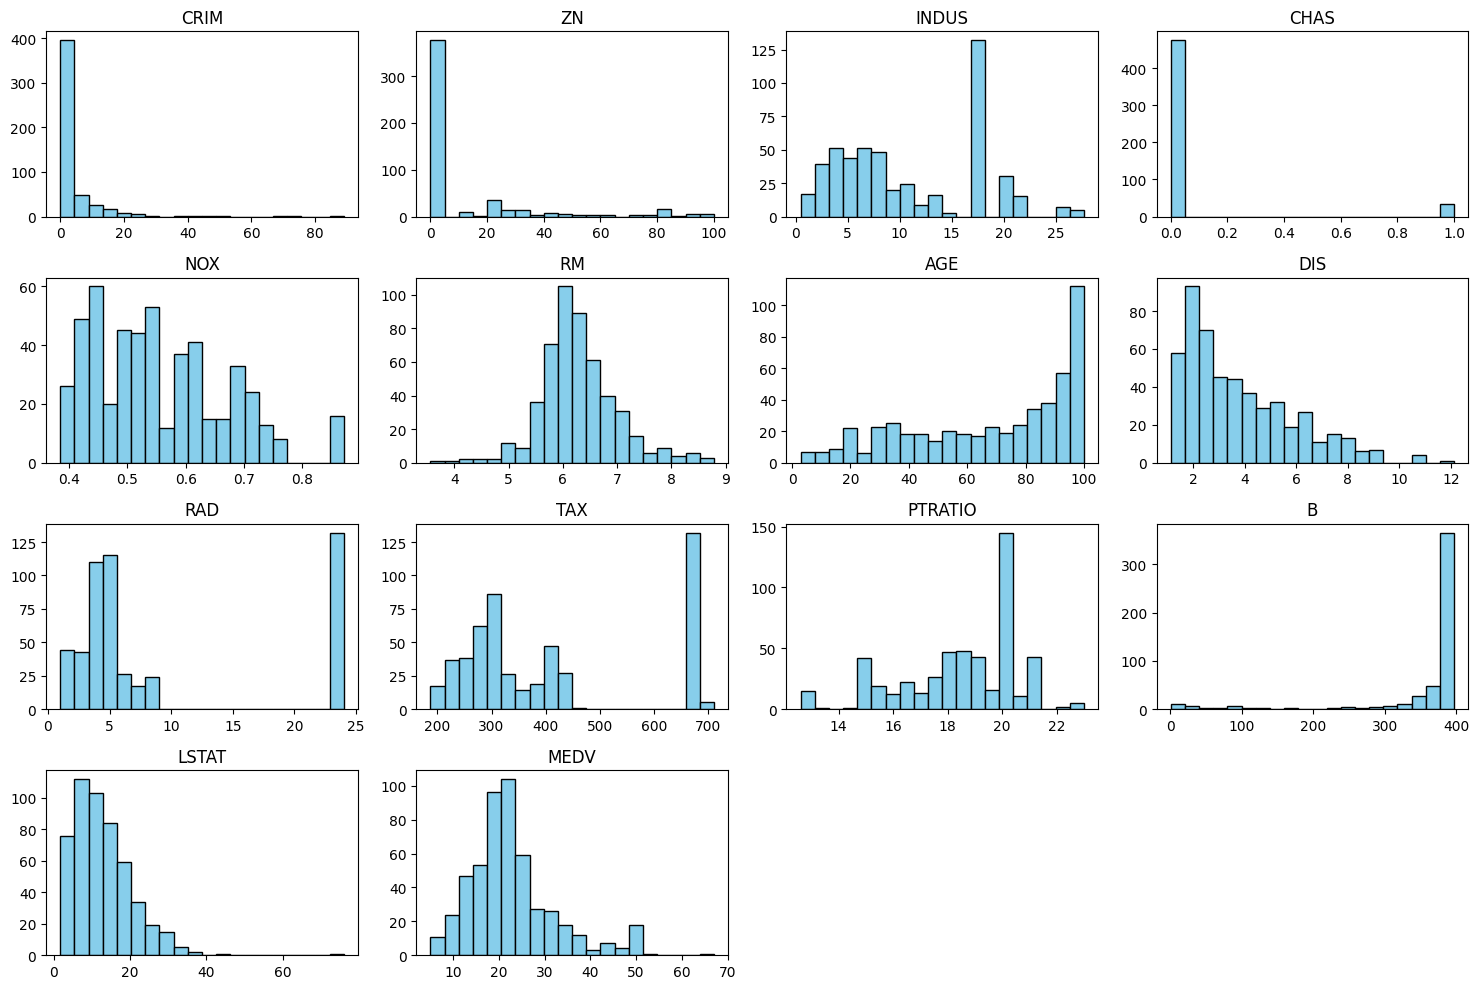

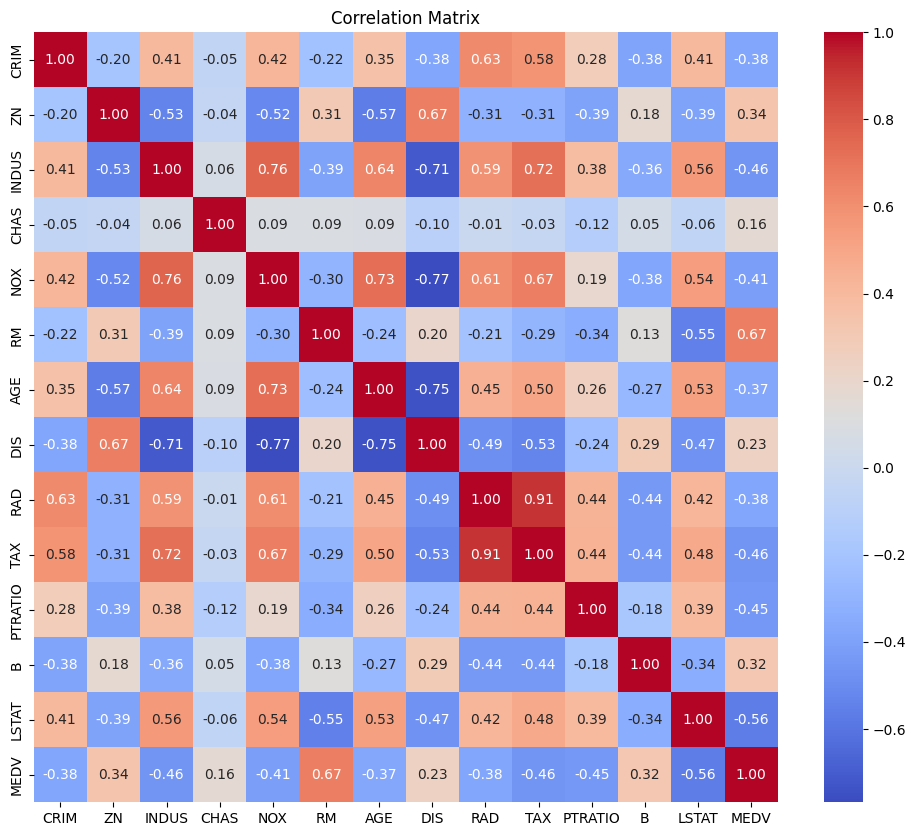

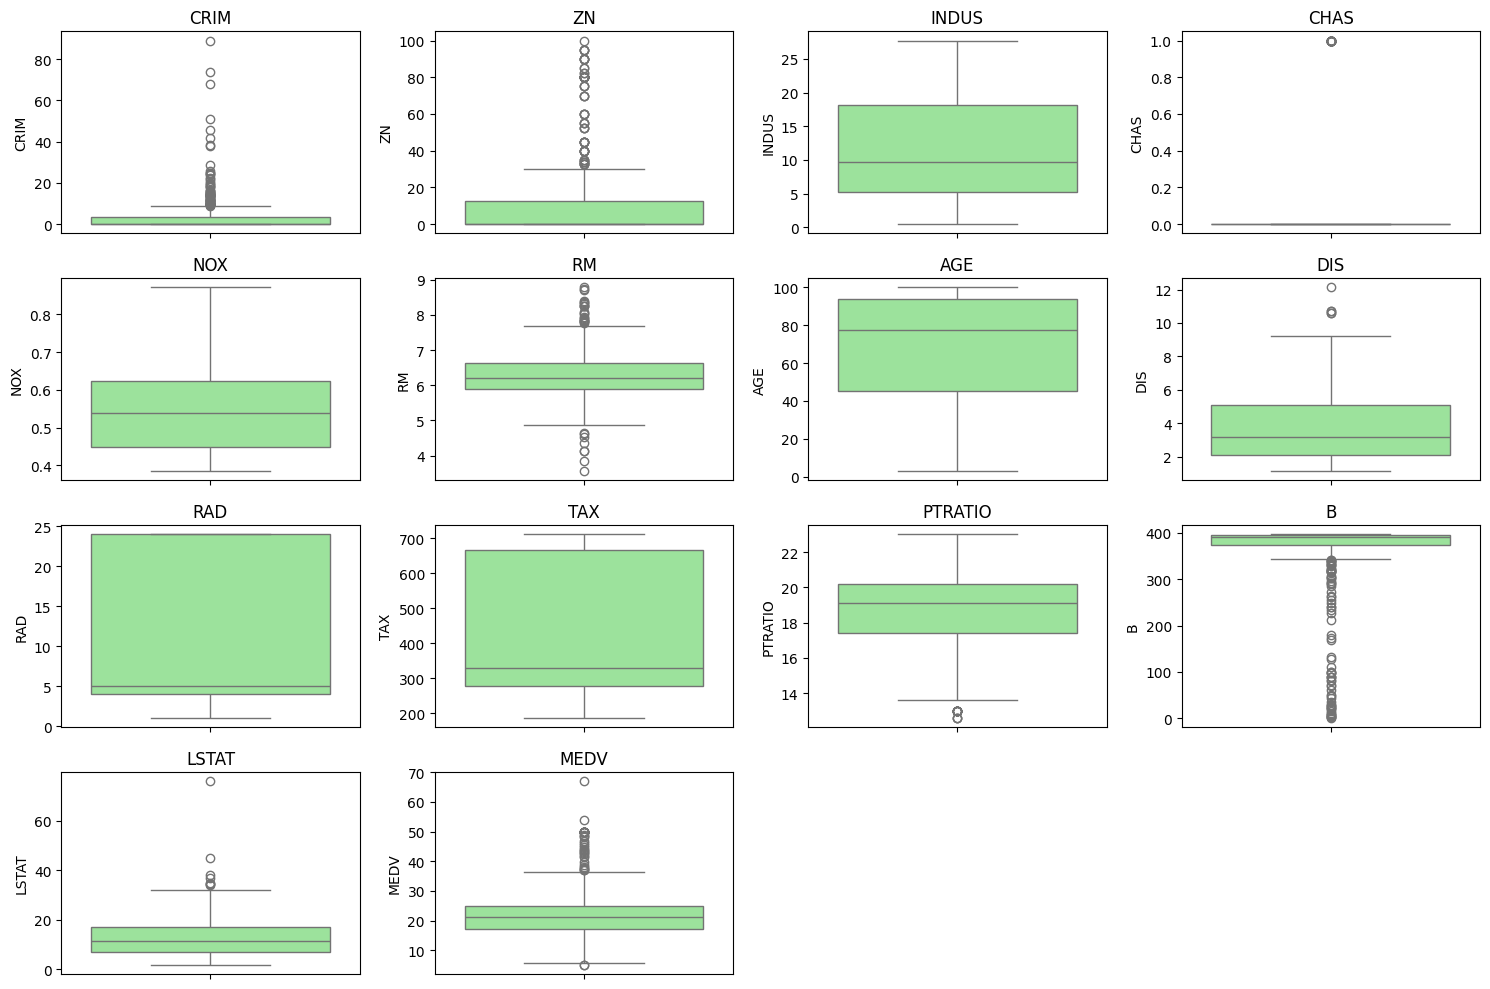

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine basic statistics
print(df.describe())

# 2. Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# 3. Analyze data types
print("\nData types:\n", df.dtypes)

# 4. Visualize data distributions (Histograms for numerical features)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(4, 4, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()


# 5. Explore relationships between variables (Correlation matrix heatmap)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 6. Identify potential outliers (Box plots for numerical features)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Impute missing values in the 'RM' column using the median, identify and handle outliers in numerical features using the IQR method, and verify data types.



<ipython-input-3-a110a1f41cd1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RM'].fillna(median_rm, inplace=True)



Data types after cleaning:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Missing values after cleaning:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


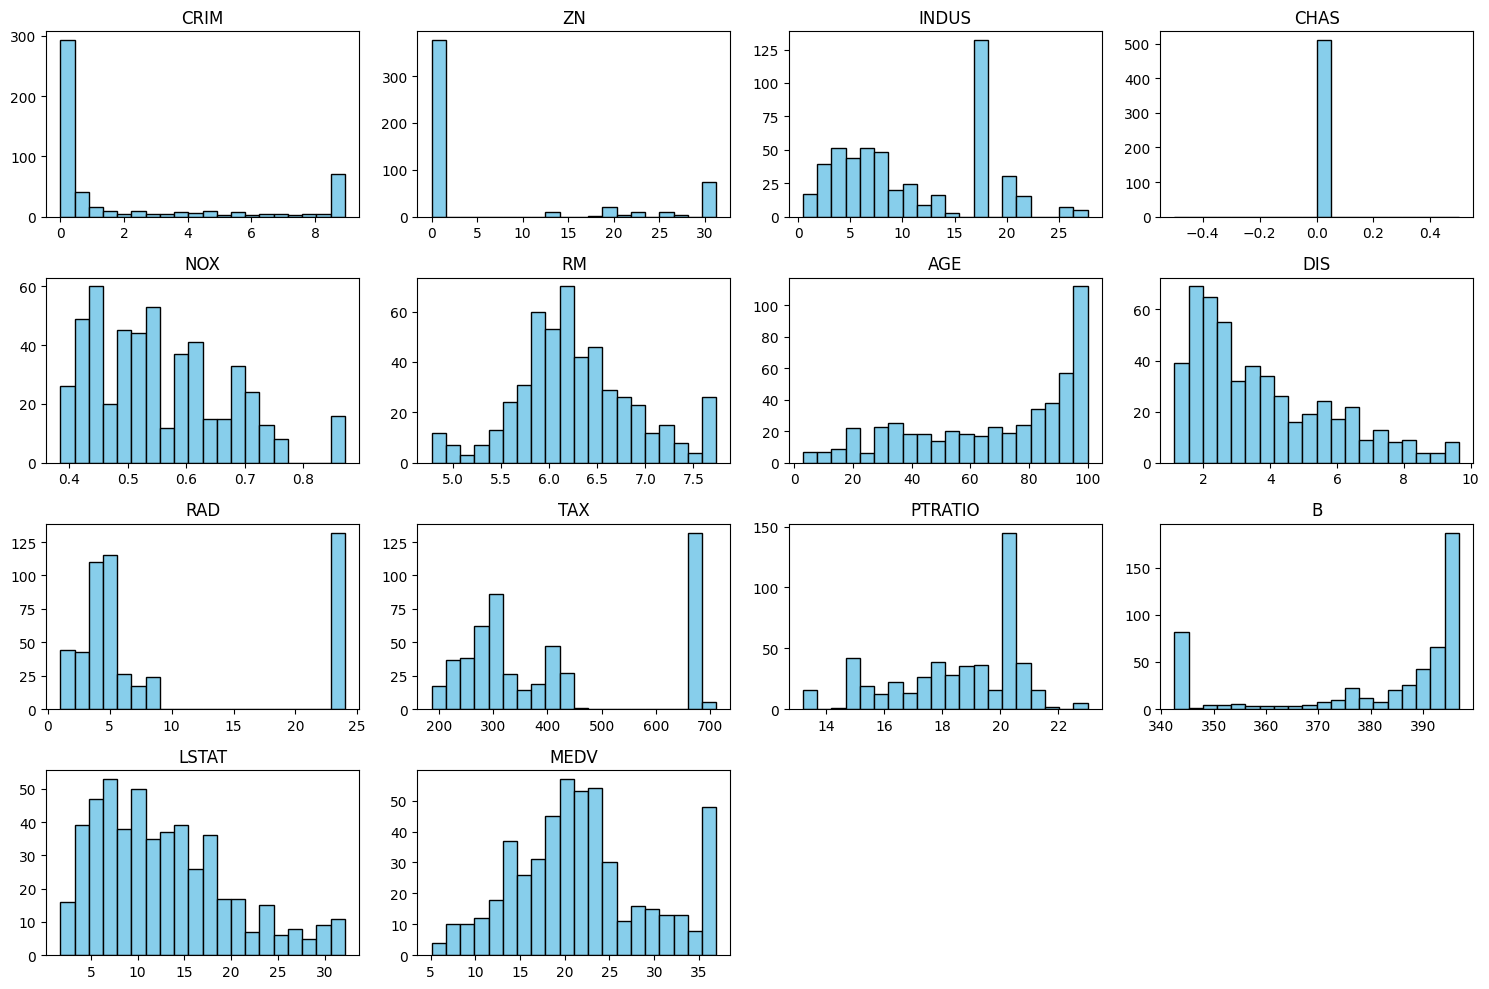

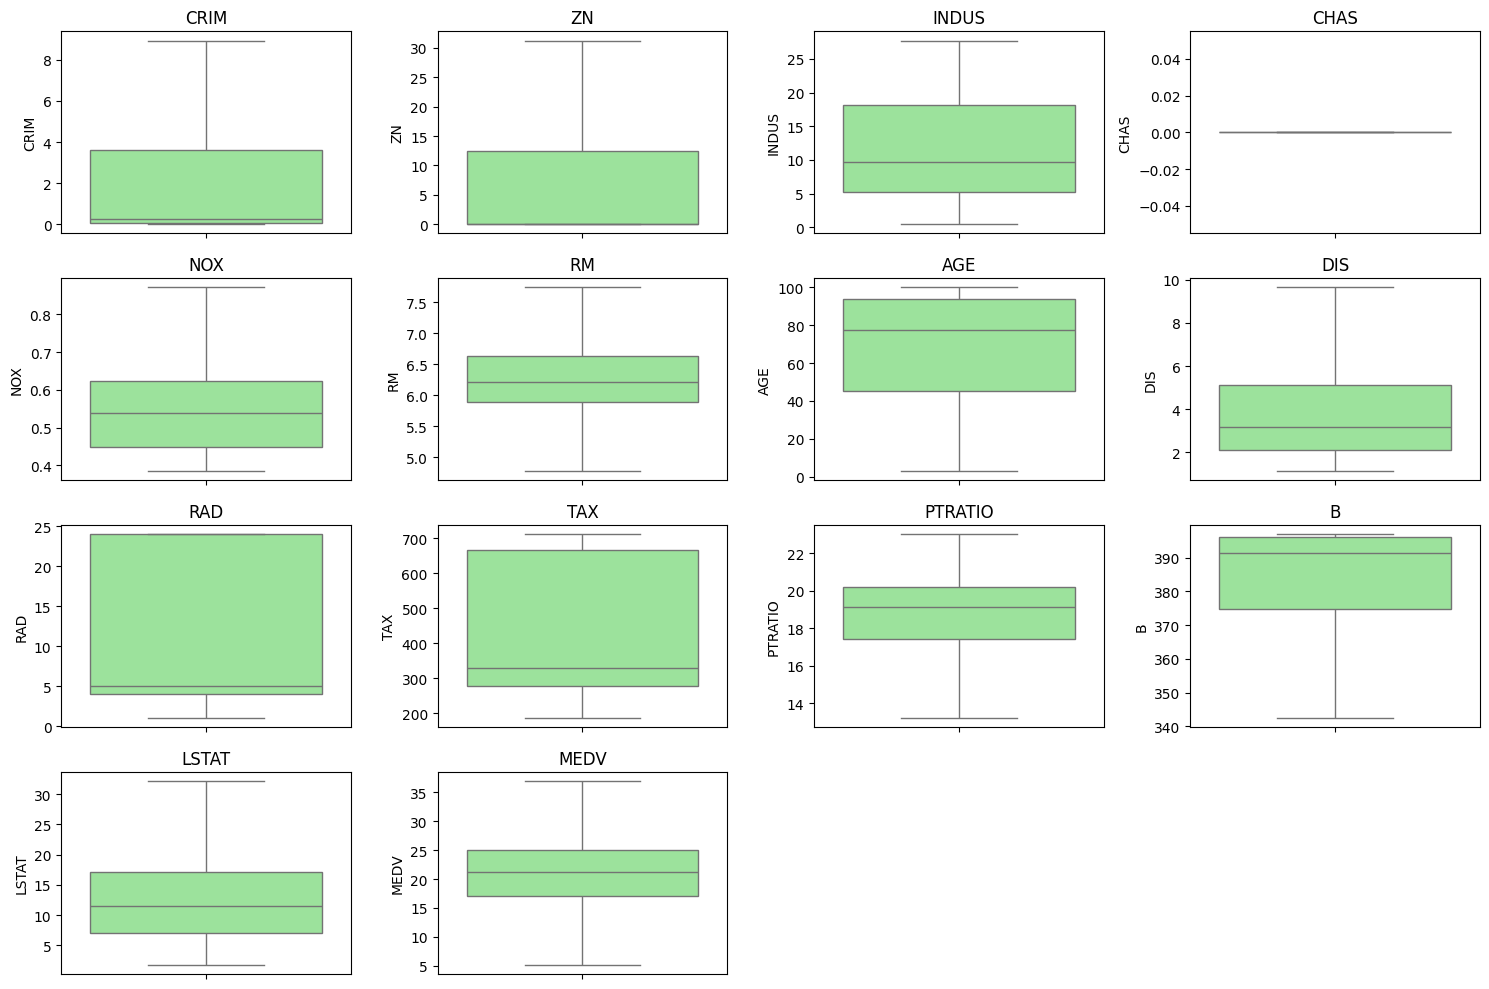

In [3]:
import numpy as np

# Impute missing values in 'RM' with the median
median_rm = df['RM'].median()
df['RM'].fillna(median_rm, inplace=True)

# Identify and handle outliers using IQR
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Verify data types (no conversion needed based on initial exploration)
print("\nData types after cleaning:\n", df.dtypes)

# Re-examine the data after cleaning
print("\nMissing values after cleaning:\n", df.isnull().sum())

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(4, 4, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Prepare the data for modeling by scaling numerical features.


**Reasoning**:
Import StandardScaler and scale the numerical features of the dataframe.



In [4]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_cols = df.select_dtypes(include=['number']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the scaled dataframe
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.670149,0.927123,-1.296065,0.0,-0.145462,0.472814,-0.121697,0.155088,-0.977576,-0.664367,-1.473302,0.785326,-1.088769,0.270009
1,-0.663710,-0.575684,-0.598270,0.0,-0.744435,0.227789,0.366340,0.581725,-0.862368,-0.986295,-0.325234,0.785326,-0.504378,-0.044269
2,-0.663716,-0.575684,-0.598270,0.0,-0.744435,1.443368,-0.267752,0.581725,-0.862368,-0.986295,-0.325234,0.579150,-1.222223,1.671163
3,-0.662158,-0.575684,-1.315123,0.0,-0.839924,1.145838,-0.812787,1.114402,-0.747160,-1.105528,0.088071,0.670333,-1.375345,1.500929
4,-0.650907,-0.575684,-1.315123,0.0,-0.839924,1.382907,-0.513552,1.114402,-0.747160,-1.105528,0.088071,0.785326,-1.039601,1.867586


## Feature engineering

### Subtask:
Engineer new features from existing ones in the DataFrame.


**Reasoning**:
Create interaction terms, polynomial features from existing numerical columns in the DataFrame.



In [5]:
# Create interaction terms
df['RM_LSTAT_interaction'] = df['RM'] * df['LSTAT']
df['CRIM_NOX_interaction'] = df['CRIM'] * df['NOX']
df['DIS_AGE_interaction'] = df['DIS'] * df['AGE']

# Create polynomial features
df['RM_squared'] = df['RM']**2
df['LSTAT_squared'] = df['LSTAT']**2
df['NOX_cubed'] = df['NOX']**3

display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_LSTAT_interaction,CRIM_NOX_interaction,DIS_AGE_interaction,RM_squared,LSTAT_squared,NOX_cubed
0,-0.670149,0.927123,-1.296065,0.0,-0.145462,0.472814,-0.121697,0.155088,-0.977576,-0.664367,-1.473302,0.785326,-1.088769,0.270009,-0.514786,0.097481,-0.018874,0.223553,1.185418,-0.003078
1,-0.663710,-0.575684,-0.598270,0.0,-0.744435,0.227789,0.366340,0.581725,-0.862368,-0.986295,-0.325234,0.785326,-0.504378,-0.044269,-0.114892,0.494089,0.213109,0.051888,0.254397,-0.412554
2,-0.663716,-0.575684,-0.598270,0.0,-0.744435,1.443368,-0.267752,0.581725,-0.862368,-0.986295,-0.325234,0.579150,-1.222223,1.671163,-1.764118,0.494094,-0.155758,2.083311,1.493830,-0.412554
3,-0.662158,-0.575684,-1.315123,0.0,-0.839924,1.145838,-0.812787,1.114402,-0.747160,-1.105528,0.088071,0.670333,-1.375345,1.500929,-1.575922,0.556162,-0.905771,1.312944,1.891574,-0.592543
4,-0.650907,-0.575684,-1.315123,0.0,-0.839924,1.382907,-0.513552,1.114402,-0.747160,-1.105528,0.088071,0.785326,-1.039601,1.867586,-1.437672,0.546712,-0.572303,1.912433,1.080771,-0.592543


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using `train_test_split`.



In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# Round the 'MEDV' values to the nearest integer. This should fix the stratification issue.
df['MEDV'] = np.round(df['MEDV'])

# Define features (X) and target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Initial split: 80% train, 20% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Further split the temp set: 50% validation, 50% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(408, 19) (408,)
(51, 19) (51,)
(52, 19) (52,)


## Model training

### Subtask:
Train a Linear Regression model on the training data.


**Reasoning**:
Train a Linear Regression model on the training data and make predictions on the validation set.



In [8]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = linear_model.predict(X_val)

## Model evaluation

### Subtask:
Evaluate the trained Linear Regression model using Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE).


**Reasoning**:
Evaluate the trained Linear Regression model using Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE).



In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate MSE, R-squared, and MAE
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)

# Print the metrics with two decimal places
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.25
R-squared: 0.77
Mean Absolute Error (MAE): 0.41


## Model optimization

### Subtask:
Optimize the hyperparameters of the linear regression model using GridSearchCV.


**Reasoning**:
Optimize the hyperparameters of the linear regression model using GridSearchCV with the provided training data.



In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Define the parameter grid
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}

# Instantiate a new LinearRegression model
linear_model = LinearRegression()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and print the best hyperparameters and best score
best_linear_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'fit_intercept': True, 'positive': False}
Best Score: -0.3514168896311404
